In [106]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import pandas_datareader as pdr
import statsmodels.formula.api as smf

In [95]:
#we're setting a start and end datetime object
#this will be the range of dates that we're going to grab stock pricing information foR
start = dt.datetime(2016, 1, 1)
end = dt.datetime(2016, 12, 31)

In [96]:
def get(tickers, startdate, enddate):
  def data(ticker):
    return (pdr.get_data_yahoo(ticker, start, end))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

In [97]:
tickers = ['AAPL','SPY']
all_data = get(tickers, start, end)

In [98]:
# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

daily_close_px.head()

Ticker,AAPL,SPY
Date,,
2016-01-04,101.790649,194.990707
2016-01-05,99.239845,195.320511
2016-01-06,97.297760,192.856674
2016-01-07,93.191338,188.229752
2016-01-08,93.684120,186.163651


In [99]:
# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Replace NA values with 0
daily_pct_change.fillna(0, inplace=True)

daily_pct_change.head()

Ticker,AAPL,SPY
Date,,
2016-01-04,0.000000,0.000000
2016-01-05,-0.025059,0.001691
2016-01-06,-0.019570,-0.012614
2016-01-07,-0.042205,-0.023992
2016-01-08,0.005288,-0.010976


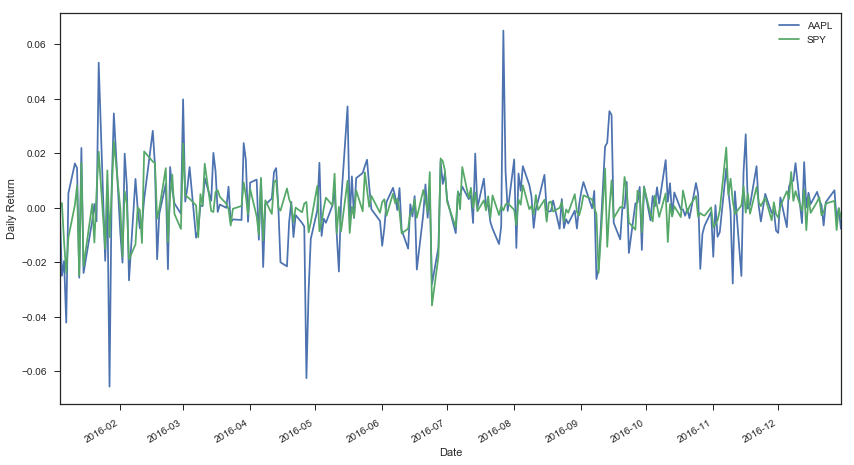

In [100]:
daily_pct_change.plot(figsize=(14,8))
plt.ylabel("Daily Return")
plt.legend()
plt.show()

In [101]:
# Import the OLS model
# Set SPY as my dependent variable, AAPL return as my independent variables
# Print out my OLS model stats result
results = smf.ols('AAPL ~ SPY', data=daily_pct_change).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.321
Method:                 Least Squares   F-statistic:                     119.9
Date:                Mon, 28 Aug 2017   Prob (F-statistic):           4.76e-23
Time:                        18:39:25   Log-Likelihood:                 755.67
No. Observations:                 252   AIC:                            -1507.
Df Residuals:                     250   BIC:                            -1500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.956e-05      0.001      0.026      0.9

In [102]:
results.params

Intercept    0.000020
SPY          1.023594
dtype: float64

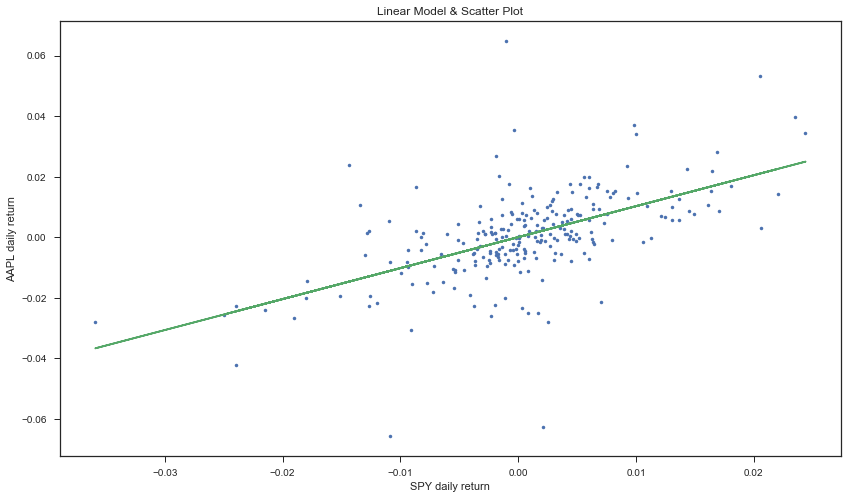

In [115]:
plt.figure(figsize=(14,8))
plt.xlabel('SPY daily return')
plt.ylabel('AAPL daily return')
plt.title('Linear Model & Scatter Plot')
plt.plot(daily_pct_change['SPY'], daily_pct_change['AAPL'], '.',
         daily_pct_change['SPY'], results.predict(daily_pct_change['SPY']), '-')

In [103]:
alpha = results.params[0]
beta = results.params[1]

In [104]:
print ('alpha: ' + str(alpha))
print ('beta: ' + str(beta))

alpha: 1.95600722021e-05
beta: 1.0235943318


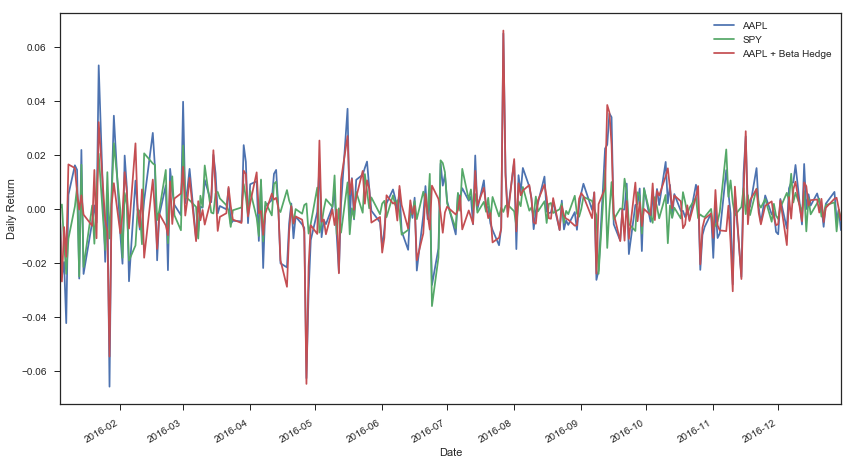

In [105]:
# Construct a portfolio with beta hedging
portfolio = -1*beta*daily_pct_change['SPY'] + daily_pct_change['AAPL']
portfolio.name = "AAPL + Beta Hedge"

daily_pct_change['AAPL'].plot(figsize=(14,8)) 
daily_pct_change['SPY'].plot(figsize=(14,8))
portfolio.plot(figsize=(14,8))
plt.ylabel("Daily Return")
plt.legend()
plt.show()